# PINN vs SWIM for the Eikonal Equaiton

In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt

from Eikonal_groundtruth import *
from funPINN import *

In [2]:
x_span = -2, 2
u_meas = np.load("datasets/recordedtimes.npy").reshape(-1, 1)
X_meas = np.load("datasets/locations.npy")

Generate the Ground Truth

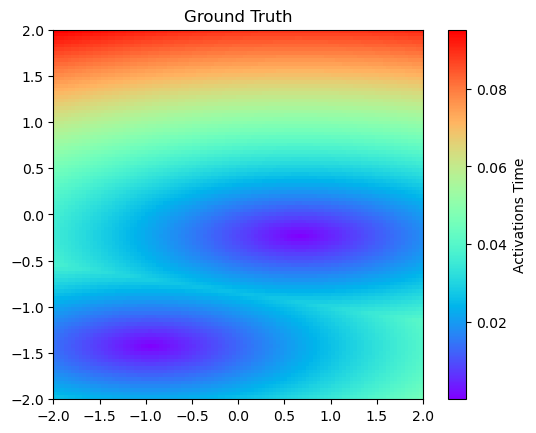

In [3]:
# Per ottenere il Ground Truth è sufficiente chiamare questa funzione
# Tutto il calcolo è contenuto in Eikonal_groundtruth.py
u_true = anysotropic_FMM_fast(x0, y0, t0, x1, y1, t1, Cv, r)

plt.imshow(u_true, extent=[*x_span, *x_span], origin="lower", cmap="rainbow")
plt.colorbar(label="Activations Time")  # orientation="horizontal"
plt.title("Ground Truth")
plt.show()

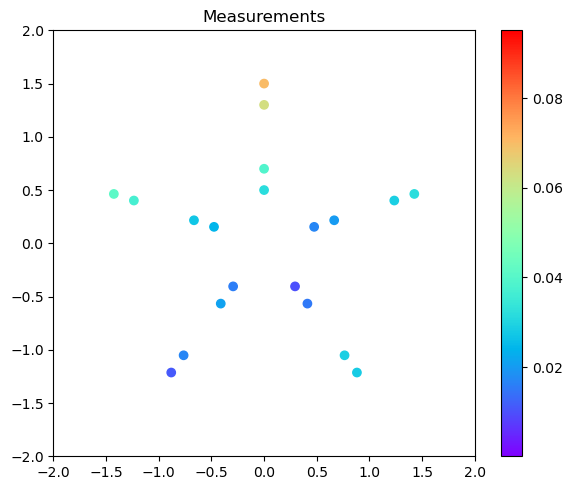

In [4]:
vmin = np.min(u_true)
vmax = np.max(u_true)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_meas[:, 0], X_meas[:, 1], c=u_meas, cmap="rainbow", vmin=vmin, vmax=vmax)
plt.colorbar(scatter, label="")

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.title("Measurements")
plt.tight_layout()
plt.show()


Generate the PINN reconstruction

In [5]:
pinn_pred = pinn_net(X_meas, u_meas)

Training: 100%|██████████| 40000/40000 [01:49<00:00, 364.10it/s] 


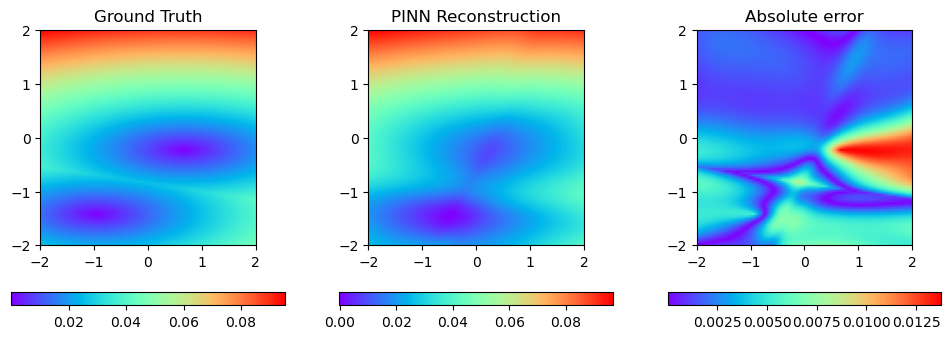

In [6]:
# Visualize predictions of u
data = {"Ground Truth": u_true,
        "PINN Reconstruction": pinn_pred,
        "Absolute error": np.abs(u_true - pinn_pred)}

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, label in zip(axes, data):
    squared = data[label].reshape(101, 101)
    im = ax.imshow(squared, extent=[*x_span, *x_span], origin="lower", cmap="rainbow")
    ax.set_title(label)
    fig.colorbar(im, ax=ax, orientation="horizontal")

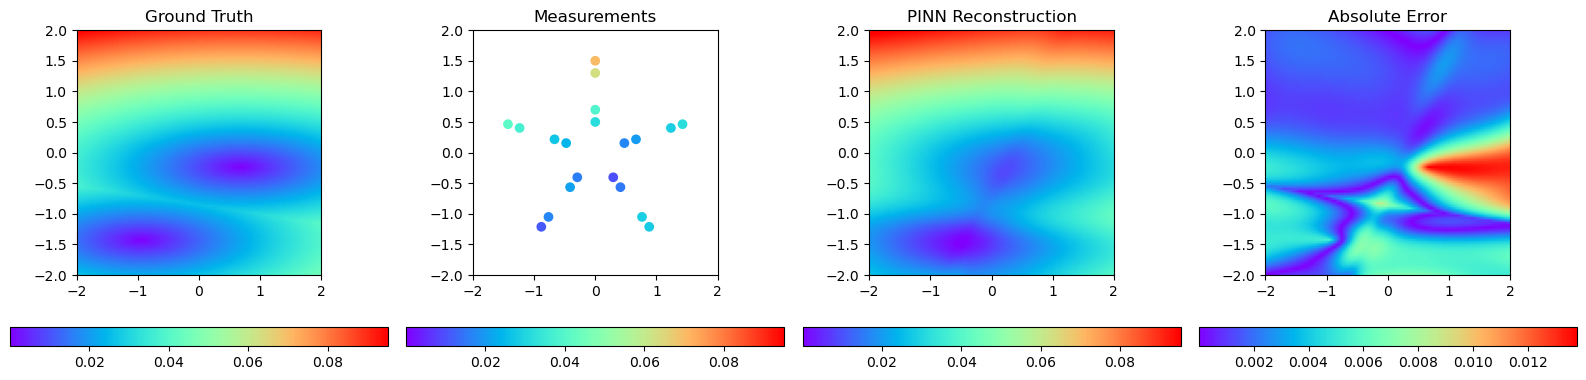

In [9]:
vmin = np.min(u_true)
vmax = np.max(u_true)

data = {
    "Ground Truth": u_true,
    "PINN Reconstruction": pinn_pred,
    "Absolute error": np.abs(u_true - pinn_pred),
}

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot 1 - Ground Truth
squared = data["Ground Truth"].reshape(101, 101)
im0 = axes[0].imshow(squared, extent=[*x_span, *x_span], origin="lower", cmap="rainbow", vmin=vmin, vmax=vmax)
axes[0].set_title("Ground Truth")
fig.colorbar(im0, ax=axes[0], orientation="horizontal")

# Plot 2 - Measurements (scatterplot)
scatter = axes[1].scatter(X_meas[:, 0], X_meas[:, 1], c=u_meas, cmap="rainbow", vmin=vmin, vmax=vmax)
axes[1].set_title("Measurements")
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
axes[1].set_aspect("equal")
fig.colorbar(scatter, ax=axes[1], orientation="horizontal")

# Plot 3 - PINN Reconstruction
squared = data["PINN Reconstruction"].reshape(101, 101)
im2 = axes[2].imshow(squared, extent=[*x_span, *x_span], origin="lower", cmap="rainbow", vmin=vmin, vmax=vmax)
axes[2].set_title("PINN Reconstruction")
fig.colorbar(im2, ax=axes[2], orientation="horizontal")

# Plot 4 - Absolute Error (con scala diversa)
squared = data["Absolute error"].reshape(101, 101)
im3 = axes[3].imshow(squared, extent=[*x_span, *x_span], origin="lower", cmap="rainbow")
axes[3].set_title("Absolute Error")
fig.colorbar(im3, ax=axes[3], orientation="horizontal")

plt.tight_layout()
plt.show()
